In [50]:
import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [51]:
folder_path = '../../output/ChannelAdaptationResults'
json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]

data = []

for json_file in json_files:
    with open(os.path.join(folder_path, json_file), 'r') as f:
        json_data = json.load(f)
        data.append(json_data)

df = pd.DataFrame(data)
df.index = [os.path.splitext(f)[0] for f in json_files]
df.head()

,selected_channel_id,selected_channels,best_threshold,accuracy,f1_score,auc,validation_time,test_time,confusion_matrix
results_global_4871,4871,"[0, 6, 7, 8, 9, 10, 18, 19]",0.897425,0.958662,0.606394,0.925532,20.944110,5.770740,"[[35335, 510], [1066, 1214]]"
results_channel_adaptation_7,7,"[10, 11, 13, 14, 15, 17, 18, 19]",0.873749,0.944315,0.595542,0.925591,12.684425,3.818120,"[[34439, 1406], [717, 1563]]"
results_channel_adaptation_1064,1064,"[3, 6, 7, 11, 13, 16, 18, 19]",0.845069,0.950321,0.631518,0.938277,12.770784,3.692270,"[[34608, 1237], [657, 1623]]"
results_channel_adaptation_6919,6919,"[0, 1, 2, 6, 8, 12, 13, 14]",0.842890,0.927187,0.509020,0.916418,13.717485,4.064587,"[[33910, 1935], [841, 1439]]"
results_global_480,480,"[5, 6, 7, 8, 11, 12, 17, 18]",0.854473,0.949770,0.609900,0.924746,20.982992,5.814062,"[[34713, 1132], [783, 1497]]"


In [52]:
df['model'] = df.index.map(lambda x: ' '.join(x.split('_')[1:-1]))
df.head()

,selected_channel_id,selected_channels,best_threshold,accuracy,f1_score,auc,validation_time,test_time,confusion_matrix,model
results_global_4871,4871,"[0, 6, 7, 8, 9, 10, 18, 19]",0.897425,0.958662,0.606394,0.925532,20.944110,5.770740,"[[35335, 510], [1066, 1214]]",global
results_channel_adaptation_7,7,"[10, 11, 13, 14, 15, 17, 18, 19]",0.873749,0.944315,0.595542,0.925591,12.684425,3.818120,"[[34439, 1406], [717, 1563]]",channel adaptation
results_channel_adaptation_1064,1064,"[3, 6, 7, 11, 13, 16, 18, 19]",0.845069,0.950321,0.631518,0.938277,12.770784,3.692270,"[[34608, 1237], [657, 1623]]",channel adaptation
results_channel_adaptation_6919,6919,"[0, 1, 2, 6, 8, 12, 13, 14]",0.842890,0.927187,0.509020,0.916418,13.717485,4.064587,"[[33910, 1935], [841, 1439]]",channel adaptation
results_global_480,480,"[5, 6, 7, 8, 11, 12, 17, 18]",0.854473,0.949770,0.609900,0.924746,20.982992,5.814062,"[[34713, 1132], [783, 1497]]",global


In [53]:
df.columns

Index(['selected_channel_id', 'selected_channels', 'best_threshold',
       'accuracy', 'f1_score', 'auc', 'validation_time', 'test_time',
       'confusion_matrix', 'model'],
      dtype='object')

In [54]:
for model in ['global', 'channel adaptation', 'Channel specific']:
    for col in ['accuracy', 'f1_score', 'auc', 'validation_time', 'test_time']:
        df['{}_{}'.format(model, col)] = df[col] * (df['model'] == model)
df.head()

,selected_channel_id,selected_channels,best_threshold,accuracy,f1_score,auc,validation_time,test_time,confusion_matrix,model,...,channel adaptation_accuracy,channel adaptation_f1_score,channel adaptation_auc,channel adaptation_validation_time,channel adaptation_test_time,Channel specific_accuracy,Channel specific_f1_score,Channel specific_auc,Channel specific_validation_time,Channel specific_test_time
results_global_4871,4871,"[0, 6, 7, 8, 9, 10, 18, 19]",0.897425,0.958662,0.606394,0.925532,20.944110,5.770740,"[[35335, 510], [1066, 1214]]",global,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
results_channel_adaptation_7,7,"[10, 11, 13, 14, 15, 17, 18, 19]",0.873749,0.944315,0.595542,0.925591,12.684425,3.818120,"[[34439, 1406], [717, 1563]]",channel adaptation,...,0.944315,0.595542,0.925591,12.684425,3.818120,0.0,0.0,0.0,0.0,0.0
results_channel_adaptation_1064,1064,"[3, 6, 7, 11, 13, 16, 18, 19]",0.845069,0.950321,0.631518,0.938277,12.770784,3.692270,"[[34608, 1237], [657, 1623]]",channel adaptation,...,0.950321,0.631518,0.938277,12.770784,3.692270,0.0,0.0,0.0,0.0,0.0
results_channel_adaptation_6919,6919,"[0, 1, 2, 6, 8, 12, 13, 14]",0.842890,0.927187,0.509020,0.916418,13.717485,4.064587,"[[33910, 1935], [841, 1439]]",channel adaptation,...,0.927187,0.509020,0.916418,13.717485,4.064587,0.0,0.0,0.0,0.0,0.0
results_global_480,480,"[5, 6, 7, 8, 11, 12, 17, 18]",0.854473,0.949770,0.609900,0.924746,20.982992,5.814062,"[[34713, 1132], [783, 1497]]",global,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [55]:
grouped_df = df.groupby(['selected_channel_id', 'model'])['accuracy', 'f1_score', 'auc', 'validation_time', 'test_time'].sum().reset_index()

# Count unique 'model' values for each 'selected_channel_id' group
model_counts = grouped_df.groupby('selected_channel_id')['model'].count()

# Filter groups where the count is at least three
selected_channel_ids_to_keep = model_counts[model_counts >= 3].index

# Filter the grouped DataFrame
filtered_grouped_df = grouped_df[grouped_df['selected_channel_id'].isin(selected_channel_ids_to_keep)]

filtered_grouped_df.head()

/tmp/ipykernel_5385/546007703.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = df.groupby(['selected_channel_id', 'model'])['accuracy', 'f1_score', 'auc', 'validation_time', 'test_time'].sum().reset_index()


,selected_channel_id,model,accuracy,f1_score,auc,validation_time,test_time
15,233,Channel specific,0.935161,0.497357,0.881392,21.979179,6.261333
16,233,channel adaptation,0.943528,0.535491,0.892817,12.962633,3.926052
17,233,global,0.950872,0.532335,0.890223,20.966030,5.760294
56,794,Channel specific,0.936734,0.520286,0.902088,22.870294,6.288098
57,794,channel adaptation,0.948721,0.551297,0.903709,13.131681,4.295380


In [56]:
filtered_grouped_df['auc'].min()

0.876965333196291

In [57]:
comp_df = filtered_grouped_df.groupby('selected_channel_id')[['model', 'auc']].agg(list)

# Create separate bar plots for each selected_channel_id
for channel_id in selected_channel_ids_to_keep:
    channel_data = comp_df.loc[channel_id]
    plt.figure()
    plt.bar(x=channel_data['model'], height = channel_data['auc'])
    plt.ylabel('AUC')
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.ylim([0.8, 1.0])
    plt.tight_layout()
    plt.savefig('../../output/VisualizeResults/20Aug_{}.png'.format(channel_id))
    plt.close()

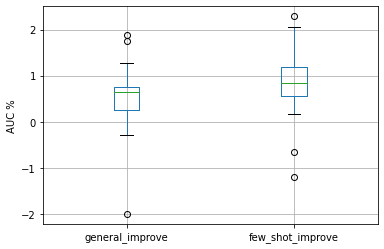

In [58]:

comp_df['few_shot_improve'] = 100*comp_df['auc'].apply(lambda x: x[1] - x[0])
comp_df['general_improve'] = 100*comp_df['auc'].apply(lambda x: x[2] - x[0])
comp_df[['general_improve', 'few_shot_improve']].boxplot()
plt.ylabel("AUC %")
plt.savefig('./auc_improvement_over_20aug.png')

In [59]:
# comp_df['Channel Adaptation'] = comp_df['auc'].apply(lambda x: x[1])
# comp_df['Hyper Global'] = comp_df['auc'].apply(lambda x: x[2])
# comp_df['Train on channel'] = comp_df['auc'].apply(lambda x: x[0])


In [60]:
# Rename values in the 'model' column
filtered_grouped_df['model'] = filtered_grouped_df['model']\
    .replace({'Channel specific': 'Train on channel',
              'channel adaptation': 'Channel adaptation\n(Proposed)',
              'global': 'Global model'})

# Change the column name 'model' to 'Model'
filtered_grouped_df = filtered_grouped_df.rename(columns={'model': 'Model'})


/tmp/ipykernel_5385/1978526583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_grouped_df['model'] = filtered_grouped_df['model']\


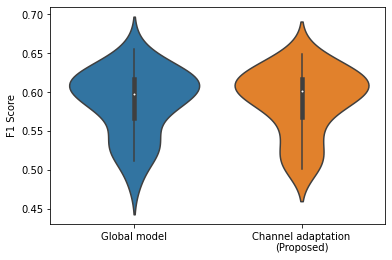

In [65]:
import seaborn as sns
# Update the condition to reflect the new names
condition = filtered_grouped_df['Model'].isin(['Channel adaptation\n(Proposed)', 'Global model'])

# Define the order of categories
category_order = ['Global model', 'Channel adaptation\n(Proposed)']

# Create the violin plot
sns.violinplot(data=filtered_grouped_df[condition], x='Model', y='f1_score',order=category_order)
plt.ylabel('F1 Score')
plt.xlabel('')
plt.savefig('../results/proposed_vs_global_f1.png', dpi=300, tight_layout=True)

In [67]:
import numpy as np
from scipy.stats import ttest_1samp
data = comp_df['few_shot_improve']
# Perform one-sample t-test
ttest_1samp(data, popmean=0)
data.tolist()

[1.1424468899966622,
 0.1620304772252834,
 1.004748759889662,
 1.031553374299199,
 1.4521869256765796,
 1.3150559303825249,
 1.7585602484380791,
 1.3004933522255957,
 1.3891382976900957,
 0.897953053228695,
 1.0325756852726076,
 0.6525139917725742,
 -1.1881541627817516,
 0.2884813512369355,
 0.5572488027153932,
 2.288368168992716,
 1.3954618202641322,
 2.055533326970649,
 1.0658347465818951,
 0.6600935313594403,
 0.5206621834262015,
 0.6526846828327715,
 0.21770757623588155,
 0.5675349274287811,
 0.6697953909743148,
 0.7617538231126764,
 1.0599162329033573,
 1.0367028605129835,
 0.729001940616647,
 0.7839497788969418,
 0.2475570989127207,
 -0.6466175027469712]

In [9]:
df[df['model'].isin(['global'])]

,selected_channel_id,selected_channels,best_threshold,accuracy,f1_score,auc,val_auc,validation_time,test_time,confusion_matrix,...,channel adaptation_accuracy,channel adaptation_f1_score,channel adaptation_auc,channel adaptation_validation_time,channel adaptation_test_time,Channel specific_accuracy,Channel specific_f1_score,Channel specific_auc,Channel specific_validation_time,Channel specific_test_time
results_global_4592,4592,"[0, 8, 9, 12, 15, 16, 17, 18]",0.849914,0.947305,0.589916,0.917885,0.908215,21.503431,5.805710,"[[34671, 1174], [835, 1445]]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
results_global_5147,5147,"[0, 4, 5, 6, 11, 16, 17, 18]",0.894535,0.957325,0.626406,0.925871,0.920102,21.410346,5.836119,"[[35134, 711], [916, 1364]]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
results_global_2486,2486,"[2, 3, 7, 8, 9, 10, 16, 17]",0.865172,0.954151,0.599450,0.926636,0.933462,21.362156,5.736017,"[[35069, 776], [972, 1308]]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
results_global_3694,3694,"[1, 2, 10, 11, 14, 15, 17, 19]",0.837669,0.942243,0.589638,0.933688,0.919165,20.847693,5.735886,"[[34341, 1504], [698, 1582]]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
results_global_6379,6379,"[0, 1, 4, 8, 12, 15, 16, 17]",0.780120,0.922649,0.527025,0.920467,0.890338,21.269034,5.772734,"[[33533, 2312], [637, 1643]]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
results_global_2409,2409,"[2, 3, 7, 13, 14, 15, 16, 19]",0.790595,0.929941,0.552521,0.932077,0.908160,20.882337,5.731205,"[[33805, 2040], [631, 1649]]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
results_global_1219,1219,"[3, 5, 8, 9, 10, 17, 18, 19]",0.879885,0.959134,0.626200,0.928424,0.921305,20.981550,5.782892,"[[35262, 583], [975, 1305]]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
results_global_6332,6332,"[0, 1, 4, 11, 14, 15, 16, 19]",0.885092,0.954702,0.615624,0.925090,0.899848,21.365162,5.872922,"[[35015, 830], [897, 1383]]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
results_global_4564,4564,"[0, 9, 10, 11, 15, 16, 17, 18]",0.906490,0.959502,0.619517,0.919406,0.917239,21.515183,5.872936,"[[35324, 521], [1023, 1257]]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
results_global_3352,3352,"[1, 6, 7, 8, 15, 16, 17, 18]",0.845465,0.952393,0.614404,0.931003,0.902107,21.303680,5.828264,"[[34864, 981], [834, 1446]]",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


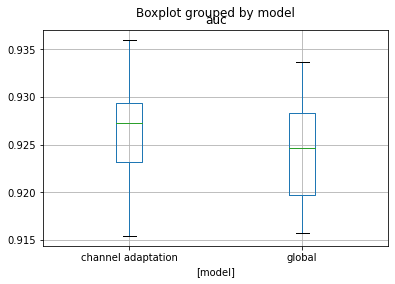

In [19]:
df[df['model'].isin(['global', 'channel adaptation'])][['model','auc']].boxplot(by='model')
plt.savefig('../../output/VisualizeResults/boxplot.png')

In [20]:
comp_df.head()

,model,auc,few_shot_improve,general_improve
selected_channel_id,,,,
685,"[Channel specific, channel adaptation, global]","[0.866273202360064, 0.91586992484699, 0.917077...",0.049597,0.050804
817,"[Channel specific, channel adaptation, global]","[0.8945374211089167, 0.9288838945949055, 0.928...",0.034346,0.034025
1219,"[Channel specific, channel adaptation, global]","[0.8553788546201604, 0.9285824994555016, 0.928...",0.073204,0.073046
2409,"[Channel specific, channel adaptation, global]","[0.9118563050463374, 0.9347238597959537, 0.932...",0.022868,0.020221
3026,"[Channel specific, channel adaptation, global]","[0.8840473481094283, 0.9264122941612646, 0.918...",0.042365,0.034172


## Spearman's Rank Correlation Coefficient

In [69]:
comp_df['proposed'] = comp_df['auc'].apply(lambda x: x[1])
comp_df['scratch'] = comp_df['auc'].apply(lambda x: x[0])
comp_df.head()

,model,auc,few_shot_improve,general_improve,proposed,scratch
selected_channel_id,,,,,,
233,"[Channel specific, channel adaptation, global]","[0.8813921905475083, 0.8928166594474749, 0.890...",1.142447,0.883033,0.892817,0.881392
794,"[Channel specific, channel adaptation, global]","[0.9020882674673852, 0.9037085722396381, 0.901...",0.162030,-0.050868,0.903709,0.902088
883,"[Channel specific, channel adaptation, global]","[0.9228806900079045, 0.9329281776068011, 0.926...",1.004749,0.403989,0.932928,0.922881
1291,"[Channel specific, channel adaptation, global]","[0.919340820491737, 0.929656354234729, 0.92189...",1.031553,0.255360,0.929656,0.919341
2471,"[Channel specific, channel adaptation, global]","[0.9155943719670219, 0.9301162412237877, 0.925...",1.452187,1.036095,0.930116,0.915594


In [73]:
from scipy.stats import spearmanr
spearmanr(comp_df['proposed'], comp_df['scratch'])

SpearmanrResult(correlation=0.7195747800586509, pvalue=3.462424738370258e-06)